(a) Load MNIST Dataset

In [ ]:
from sklearn.datasets import fetch_openml


In [ ]:
mnist=fetch_openml('mnist_784',version=1,as_frame=False)
mnist

{'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]),
 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object),
 'frame': None,
 'categories': {'class': ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']},
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47

In [ ]:
import numpy as np
X = mnist["data"]
y = mnist["target"].astype(np.uint8)


 (b) Split Data (60k train, 10k test)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=60000,test_size=10000,random_state=42,stratify=y)
print("Shape of training set: ",X_train.shape)
print("Shape of testing set: ",X_test.shape)

Shape of training set:  (60000, 784)
Shape of testing set:  (10000, 784)


(c) Train Classifiers

SGD (hinge loss = SVM):



In [ ]:
from sklearn.linear_model import SGDClassifier


In [ ]:
sgd=SGDClassifier(loss='hinge',random_state=42)

In [ ]:
sgd.fit(X_train,y_train)

SGDClassifier(random_state=42)

In [ ]:
sgd_pred=sgd.predict(X_test)


In [ ]:
from sklearn.metrics import accuracy_score
sgd_accuracy=accuracy_score(y_test,sgd_pred)
print("Accuracy Score: ",sgd_accuracy)

Accuracy Score:  0.8856


Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100,random_state=42)

In [ ]:
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [ ]:
rf_pred=rf.predict(X_test)


In [ ]:
rf_accuracy=accuracy_score(y_test,rf_pred)
print("Accuracy Score: ",rf_accuracy)

Accuracy Score:  0.9683


(d) Evaluate Performance

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
print("SGD Report: \n",classification_report(y_test,sgd.predict(X_test)))
print("RF Report: \n",classification_report(y_test,rf.predict(X_test)))

SGD Report: 
               precision    recall  f1-score   support

           0       0.96      0.96      0.96       986
           1       0.96      0.96      0.96      1125
           2       0.92      0.82      0.87       999
           3       0.74      0.92      0.82      1020
           4       0.95      0.88      0.91       975
           5       0.92      0.72      0.81       902
           6       0.91      0.97      0.94       982
           7       0.92      0.92      0.92      1042
           8       0.85      0.78      0.81       975
           9       0.78      0.90      0.84       994

    accuracy                           0.89     10000
   macro avg       0.89      0.88      0.88     10000
weighted avg       0.89      0.89      0.89     10000

RF Report: 
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       986
           1       0.99      0.99      0.99      1125
           2       0.97      0.97      0.97       9

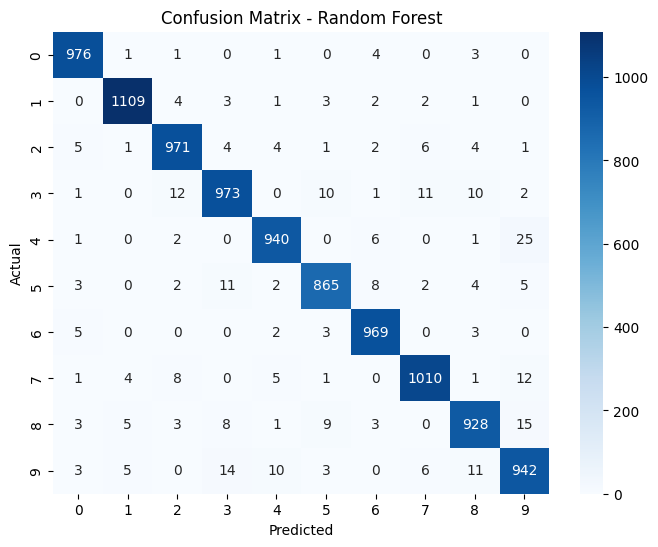

In [ ]:
cm = confusion_matrix(y_test, rf_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

(e) Visualize Misclassifications (worst errors)

In [ ]:
misclassified_indexes = np.where(rf_pred != y_test)[0]
worst = []

for idx in misclassified_indexes:
    probas = rf.predict_proba([X_test[idx]])[0]
    confidence = np.max(probas)
    worst.append((confidence, idx))

worst.sort(reverse=True)
worst = worst[:9]

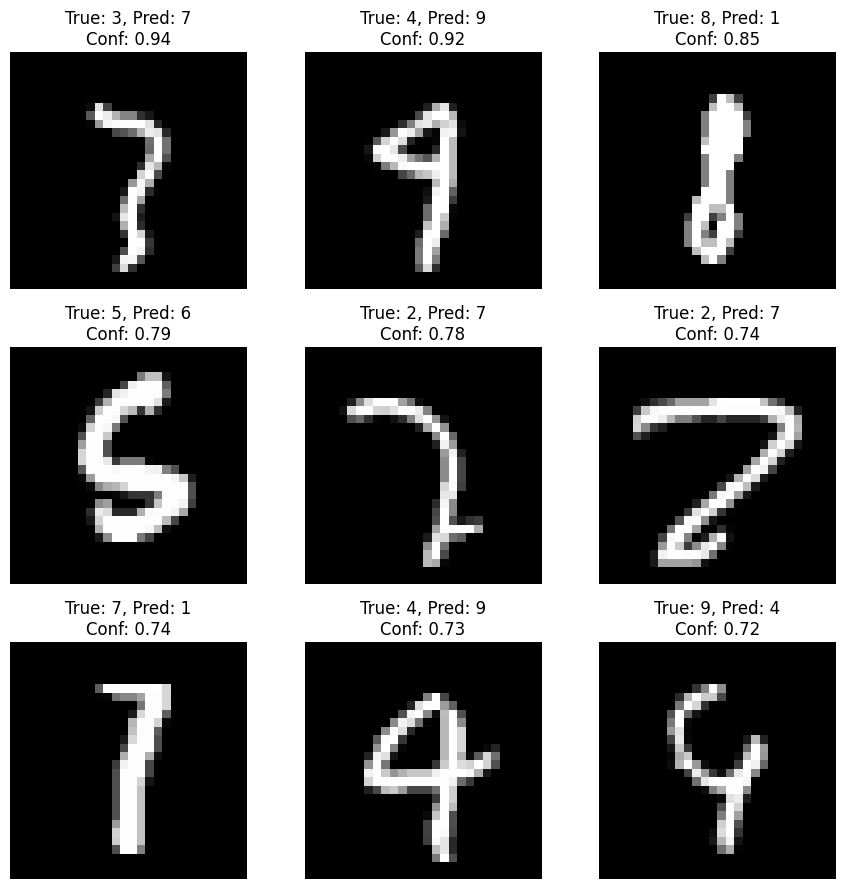

In [ ]:
plt.figure(figsize=(9, 9))
for i, (conf, idx) in enumerate(worst):
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_test[idx].reshape(28, 28), cmap='gray')
    plt.title(f"True: {y_test[idx]}, Pred: {rf_pred[idx]}\nConf: {conf:.2f}")
    plt.axis("off")
plt.tight_layout()
plt.show()

Save Model

In [ ]:
import joblib
joblib.dump(rf, "model.joblib")

['model.joblib']

In [ ]:
import numpy as np
from tensorflow.keras.datasets import mnist
from PIL import Image
import os

# Create a folder to save images
output_dir = "mnist_test_images"
os.makedirs(output_dir, exist_ok=True)

# Load the MNIST dataset
(_, _), (x_test, y_test) = mnist.load_data()

# Save the first 10 test images
for i in range(10):
    img_array = x_test[i]  # Shape: (28, 28)
    label = y_test[i]

    # Convert to PIL image
    img = Image.fromarray(img_array.astype(np.uint8), mode='L')

    # Build the filename
    filename = f"mnist_digit_{label}_{i}.png"
    filepath = os.path.join(output_dir, filename)

    # Save the image
    img.save(filepath)
    print(f"Saved: {filepath}")


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Saved: mnist_test_images/mnist_digit_7_0.png
Saved: mnist_test_images/mnist_digit_2_1.png
Saved: mnist_test_images/mnist_digit_1_2.png
Saved: mnist_test_images/mnist_digit_0_3.png
Saved: mnist_test_images/mnist_digit_4_4.png
Saved: mnist_test_images/mnist_digit_1_5.png
Saved: mnist_test_images/mnist_digit_4_6.png
Saved: mnist_test_images/mnist_digit_9_7.png
Saved: mnist_test_images/mnist_digit_5_8.png
Saved: mnist_test_images/mnist_digit_9_9.png


/tmp/ipython-input-24-4177328482.py:19: DeprecationWarning: 'mode' parameter is deprecated and will be removed in Pillow 13 (2026-10-15)
  img = Image.fromarray(img_array.astype(np.uint8), mode='L')


In [28]:
from google.colab import files
files.download("mnist_test_images")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>